# Task 2 : Diffusion Maps

In [1]:
from diffusion_maps import DiffusionMaps
import numpy as np
import math
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

from pca import PCA
from pathlib import Path

import warnings
warnings.filterwarnings("ignore")

## Part One
### Similarity between Diffusion Maps and Fourier analysis

$$ X = x_k \in \mathbb{R}^2, x_k = (\cos(t_k), \sin(t_k)), t_k = (2 \pi k)/N + 1$$

Let's start by defining $t_k$ and implementing the Fourier analysis

In [2]:
N = 1000
t_k = lambda N,k : (2 * math.pi * k) / (N + 1)

# We define an empty Numpy array to store both the sin and cosine values for t_k for the time step k
values = np.zeros((N, 2))

# Also for each solution t_k, we are going to append it to the T array
T = np.zeros(N)

for i in range(N):
    step = i + 1
    T[i] = t_k(N, step)
    values[i] = (math.cos(T[i]),math.sin(T[i]))

Now let's compute the diffusion map for 5 eigenfunctions and plot them seperately.

In [3]:
L = 4
diffusion = DiffusionMaps()
eigvals, eigvecs = diffusion.diffusion_algorithm(values, L)

(1000, 1000)

(1000, 1000)


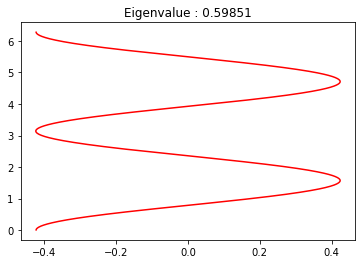

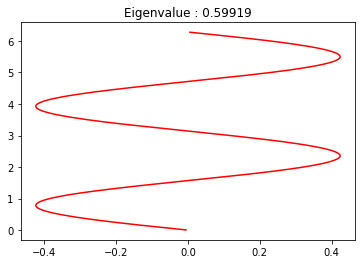

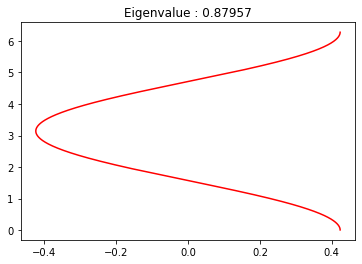

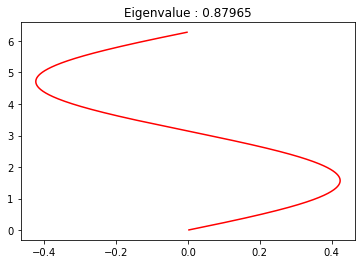

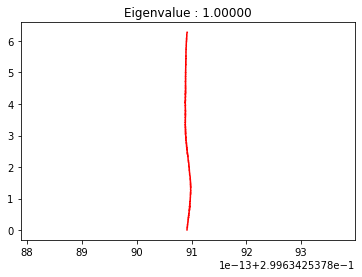

In [4]:
for eigval in range(eigvals.shape[0]):
    plt.title(f"Eigenvalue : {eigvals[eigval]:.5f}")
    plt.plot(eigvecs[:,eigval], T,  color="red")
    plt.show()

### Let's visualize the results for the Fourier

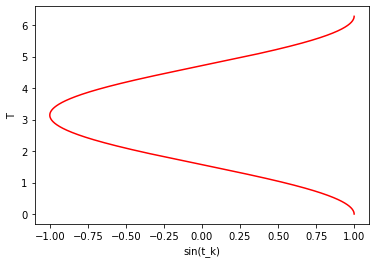

In [5]:
# sin values w.r.t to the T. 
plt.plot(values[:, 0], T, 'k', color='red')
plt.xlabel('sin(t_k)')
plt.ylabel('T');

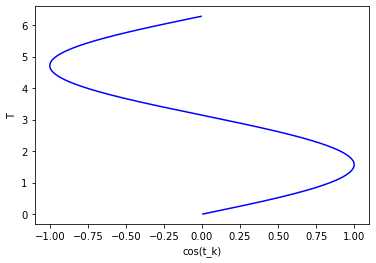

In [6]:
# cos values w.r.t to the T
plt.plot(values[:, 1], T, 'k', color='blue')
plt.xlabel('cos(t_k)')
plt.ylabel('T');

## Part Two 
### Swiss Roll Manifold

First ten eigenfunctions of the Laplace-Beltrami operator defined through:

$$ X = {\{x_k \in \mathbb{R}^3}\}_{k=1}^{N}, x_k = (u \cos(u), v, u \sin(u)) $$

First, let's generate the swiss roll dataset and visualize it.

In [17]:
from sklearn.datasets import make_swiss_roll

# By default, make_swiss_roll returns 3-dimensional dataset.
swiss_roll, t = make_swiss_roll(5000)
swiss_roll.shape
t.shape

(5000,)

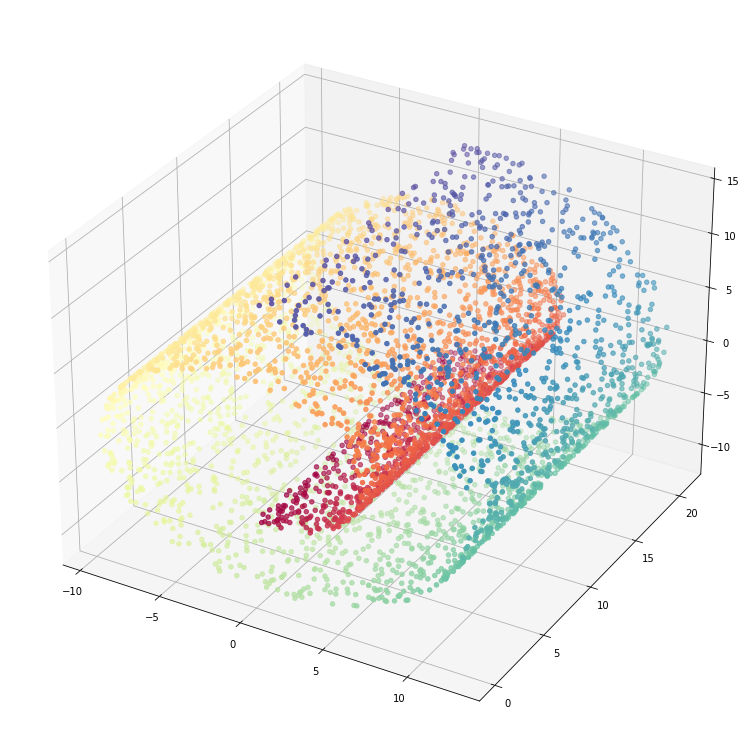

In [18]:
fig = plt.figure(figsize=(15, 30))

ax = fig.add_subplot(211, projection='3d')
ax.scatter(swiss_roll[:, 0], swiss_roll[:, 1], swiss_roll[:, 2], c=t, cmap=plt.cm.Spectral)

We then call the diffusion function to create the 10 eigenfunctions. The first non-constant eigenfunction ( $\phi_l$ != 1) is the penultimate value in the eigenvecs variable, so we select it and plot against the others. In the below plot, eigenvalues are in descending order i.e ( $\phi_0 > \phi_1 > \phi_2$)

In [19]:
eigenvals, eigenvecs = diffusion.diffusion_algorithm(swiss_roll, 10)

(5000, 5000)


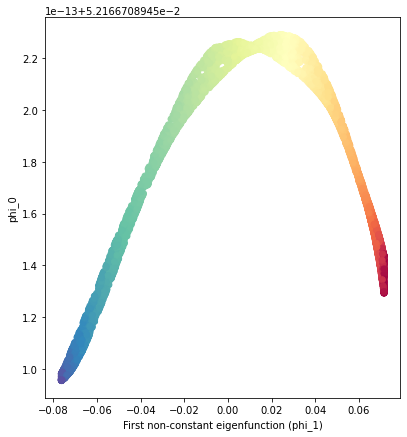

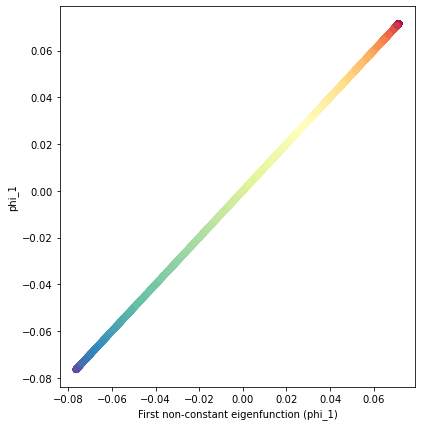

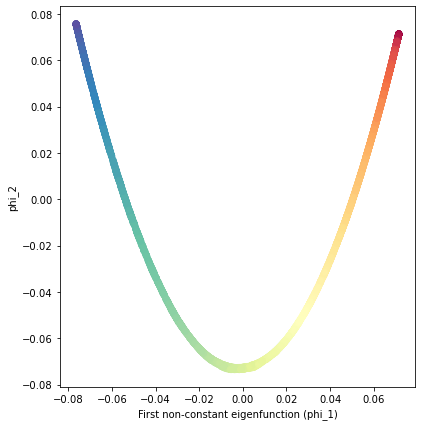

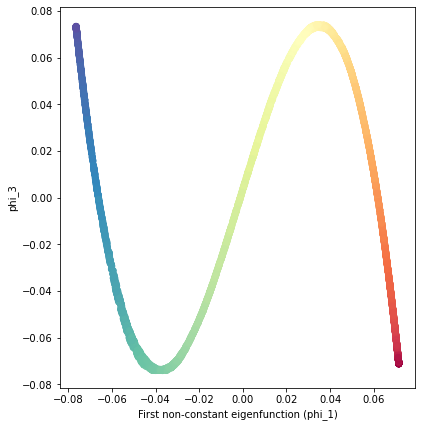

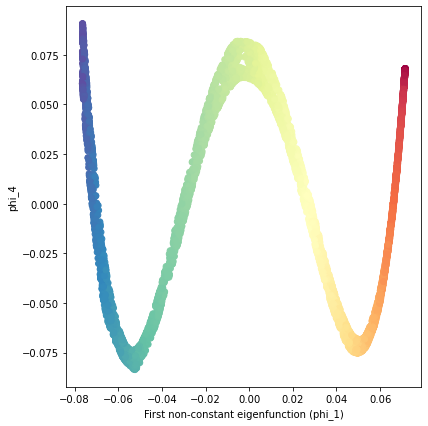

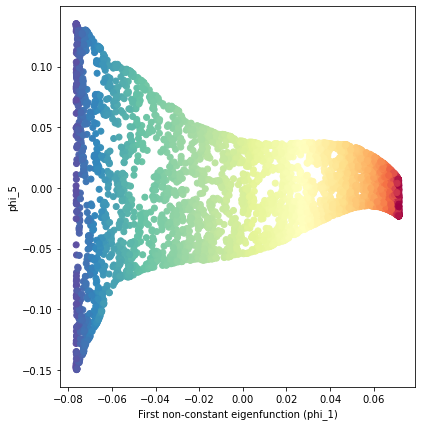

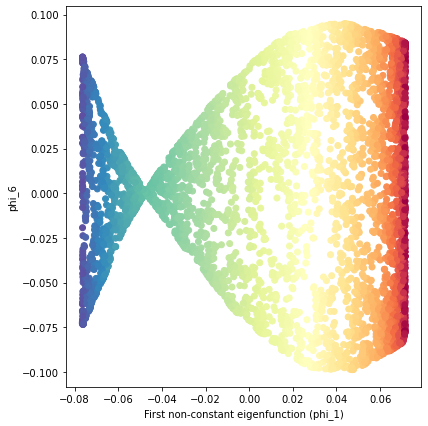

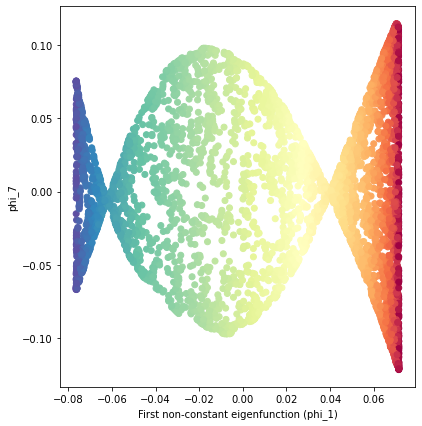

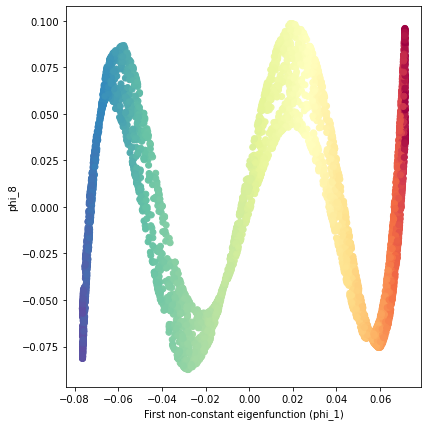

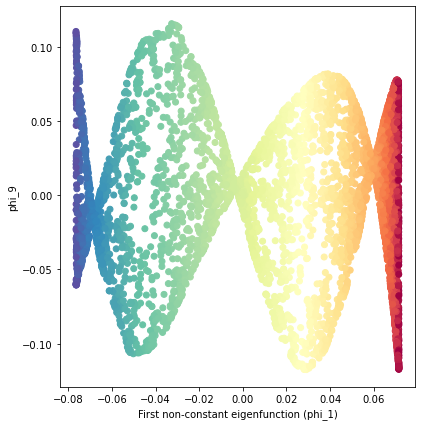

In [20]:
non_const_eigenfunc = eigenvecs[:, -2]

j = 0
for i in range(len(eigenvals) - 1):
    fig = plt.figure(figsize=(14,7))
    ax = fig.add_subplot(121)
    ax.scatter(non_const_eigenfunc, eigenvecs[:,len(eigenvals) - 1 - j], c=t, cmap=plt.cm.Spectral)
    ax.set_xlabel(f"First non-constant eigenfunction (phi_1)")
    ax.set_ylabel(f'phi_{i}');
    j += 1

In [21]:
# TODO : At what value of l, phi_l not longer a function of phi_1?

Next, we compute the three principal components of this dataset

In [22]:
pca = PCA()
pca.pca(swiss_roll)

In [23]:
# Components and energy per components
pca.getComponents()

array([[-0.51580563, -0.07372273, -0.85352768],
       [-0.85605254,  0.08324805,  0.51014098],
       [-0.03344553, -0.99379813,  0.10605034]])

In [24]:
pca.getEnergyPerComponent()

array([0.39670395, 0.312128  , 0.29116805])

With two principal components

Total energy:  0.7088319527276008


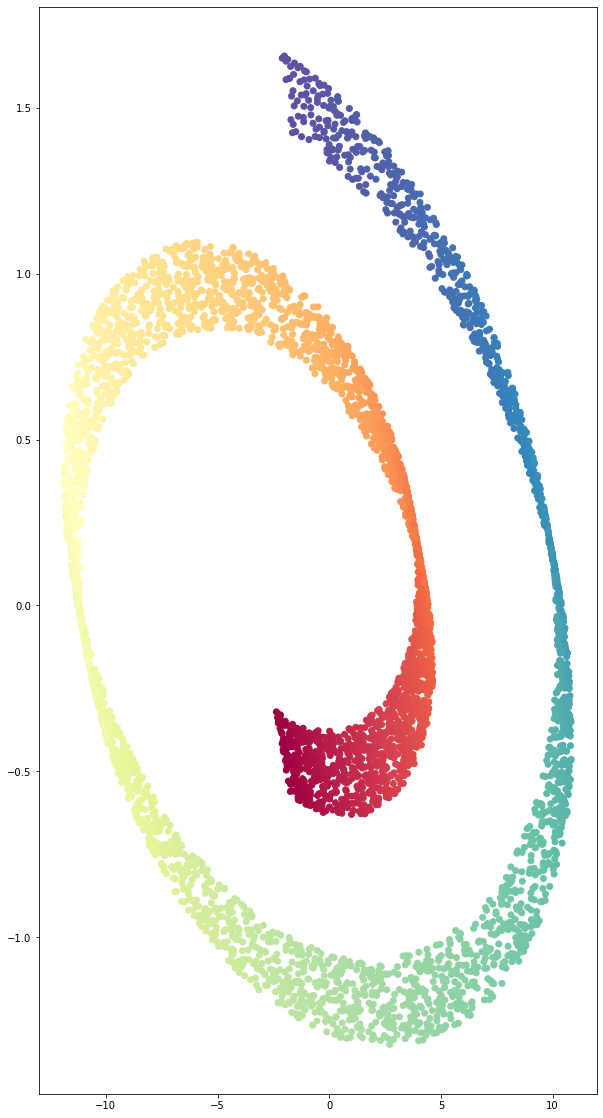

In [27]:
pca = PCA()
pca.pca(swiss_roll)

reconstructed, energy = pca.getReconstructedData(nComponents=2)
print("Total energy: ", energy)
fig = plt.figure(figsize=(10, 20))
ax = fig.add_subplot(111)
ax.scatter(reconstructed[:,0],reconstructed[:,1], c=t, cmap=plt.cm.Spectral)

By having only 2 principal components, we capture ~70% of the total energy. For 1000 data points in the swiss roll dataset, we try exactly the same procedure, create the set, compute the 10 eigenfunctions and so on : 

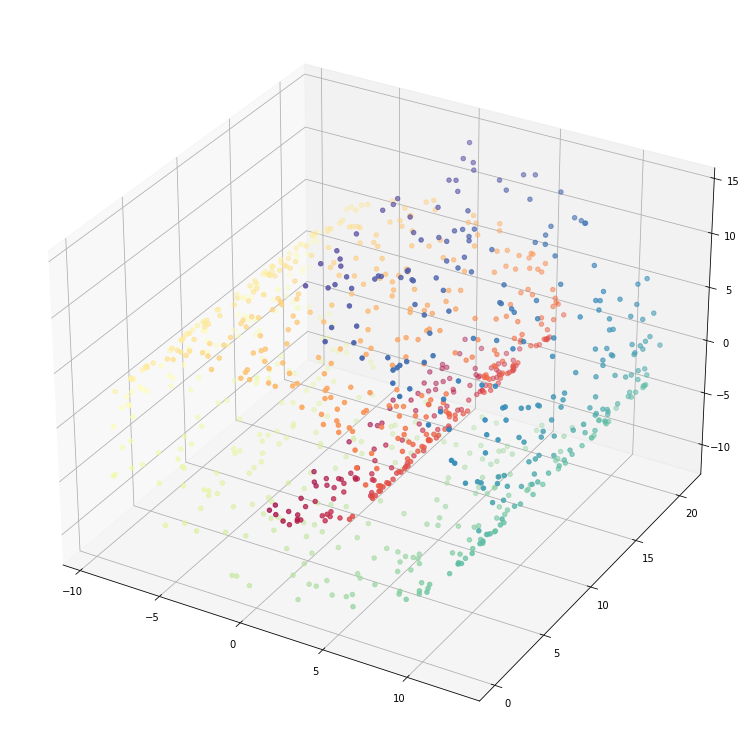

In [29]:
swiss_roll, t_color = make_swiss_roll(1000)

fig = plt.figure(figsize=(15, 30))

ax = fig.add_subplot(211, projection='3d')
ax.scatter(swiss_roll[:, 0], swiss_roll[:, 1], swiss_roll[:, 2], c=t_color, cmap=plt.cm.Spectral)

In [30]:
eigenvals, eigenvecs = diffusion.diffusion_algorithm(swiss_roll, 10)

print(eigenvals)

(1000, 1000)
[0.99779255 0.99801089 0.99827348 0.99846087 0.99858172 0.99885159
 0.9989975  0.99934726 0.99970154 0.99993242 1.        ]


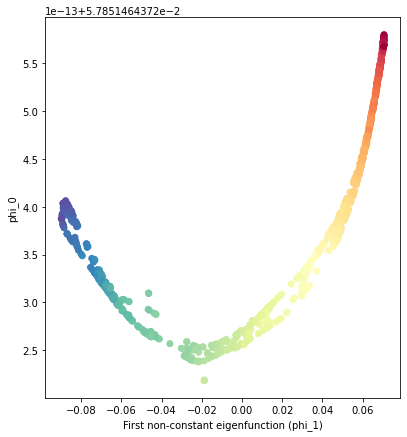

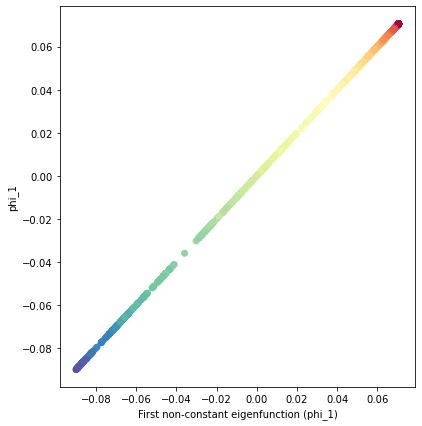

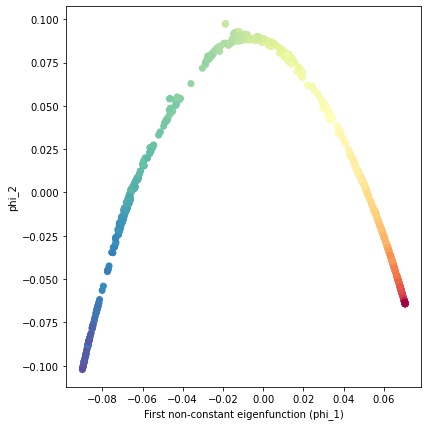

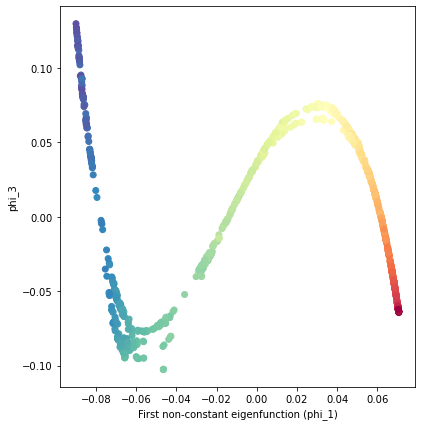

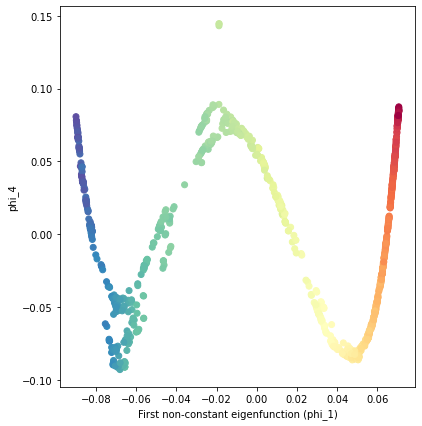

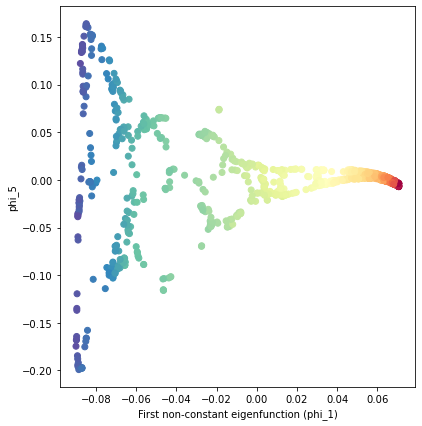

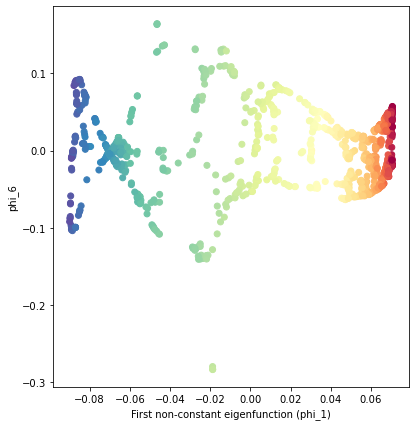

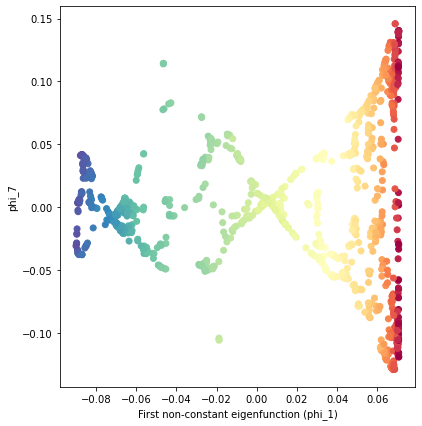

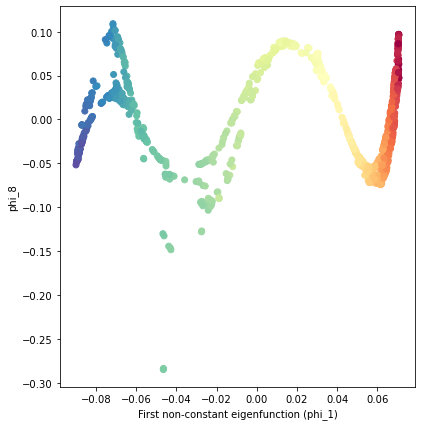

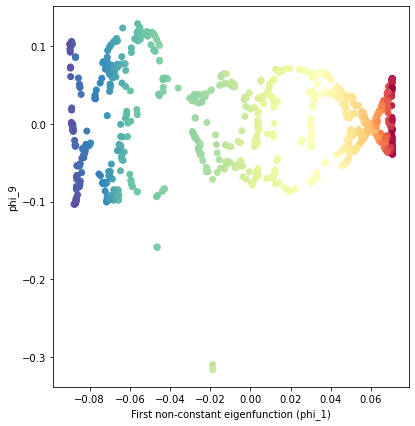

In [32]:
non_const_eigenfunc = eigenvecs[:, -2]

j = 0
for i in range(len(eigenvals) - 1):
    fig = plt.figure(figsize=(14,7))
    ax = fig.add_subplot(121)
    ax.scatter(non_const_eigenfunc, eigenvecs[:,len(eigenvals) - 1 - j], c=t_color, cmap=plt.cm.Spectral)
    ax.set_xlabel(f"First non-constant eigenfunction (phi_1)")
    ax.set_ylabel(f'phi_{i}');
    j += 1

Lastly, we apply the PCA both with 3 components and 2 components

In [37]:
pca = PCA()
pca.pca(swiss_roll)

pca.getComponents()

array([[-0.52583317,  0.08424219, -0.84640577],
       [-0.81776785,  0.22368034,  0.53030449],
       [-0.23399835, -0.97101512,  0.04872799]])

Total energy:  1.0


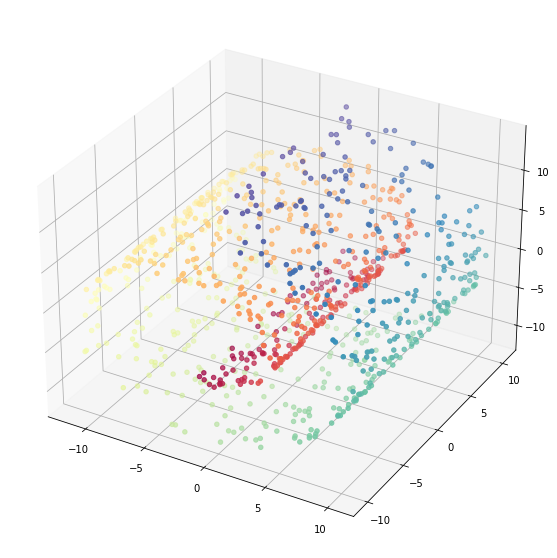

In [41]:
# 3 Components
pca = PCA()
pca.pca(swiss_roll)

reconstructed, energy = pca.getReconstructedData(nComponents=3)
print("Total energy: ", energy)
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(reconstructed[:,0],reconstructed[:,1], reconstructed[:,2], c=t_color, cmap=plt.cm.Spectral)

Total energy:  0.7095117269284607


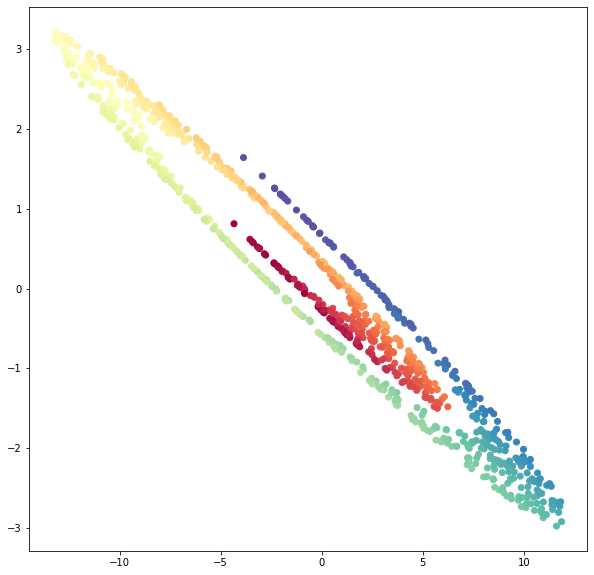

In [42]:
# 2 Components
pca = PCA()
pca.pca(swiss_roll)

reconstructed, energy = pca.getReconstructedData(nComponents=2)
print("Total energy: ", energy)
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
ax.scatter(reconstructed[:,0],reconstructed[:,1], c=t_color, cmap=plt.cm.Spectral)

# Part 3 - Vadere File

Let's start by loading the file

In [43]:
data = Path('') / 'data'
DMAP_vadere_data = np.loadtxt(data / 'data_DMAP_PCA_vadere.txt', dtype = 'double')

In [44]:
DMAP_vadere_data.shape

(1000, 30)

First let's visualize the dataset with Diffusion maps by creating only two eigenfunction. L value is going to pass L+1 to the eigensolver(see ```diffusion_maps.py``` file)

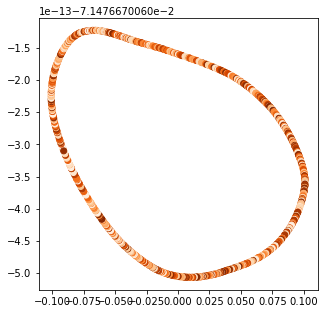

In [45]:
# Two eigenfunctions

L = 1
eigenvalue, eigenvector = diffusion.diffusion_algorithm(DMAP_vadere_data, L)

fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)

ax.scatter(eigenvector[:,0],eigenvector[:,1], c=t_color, cmap=plt.cm.Oranges)

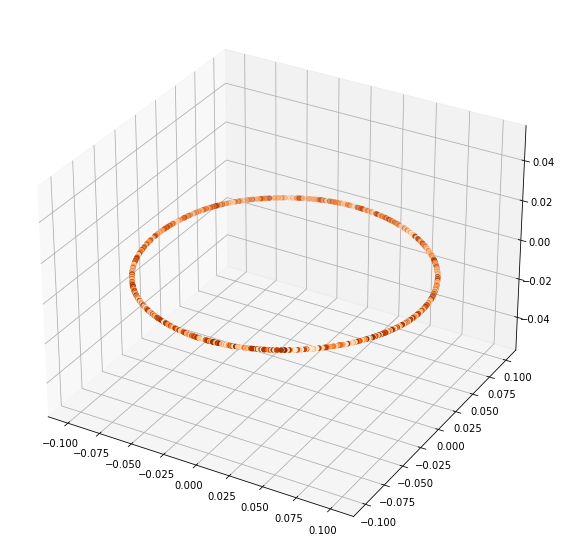

In [46]:
# Three eigenfunctions

L = 2
eigenvalue, eigenvector = diffusion.diffusion_algorithm(DMAP_vadere_data, L)

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(eigenvector[:, 0], eigenvector[:, 1], c=t_color, cmap=plt.cm.Oranges)

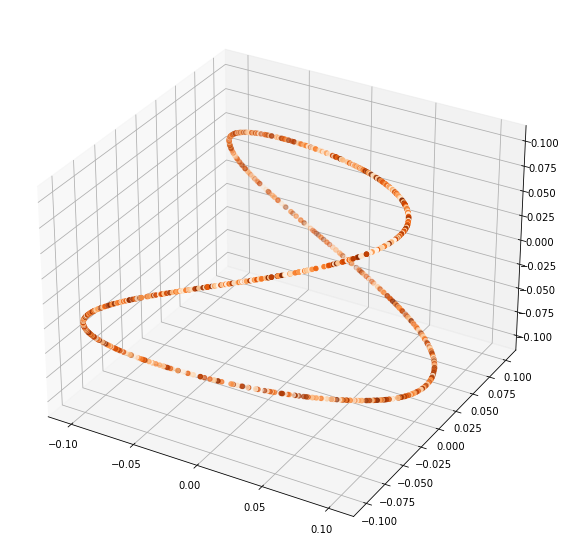

In [47]:
# Four eigenfunctions

L = 3
eigenvalue, eigenvector = diffusion.diffusion_algorithm(DMAP_vadere_data, L)

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(eigenvector[:, 0], eigenvector[:, 1], eigenvector[:, 2], c=t_color, cmap=plt.cm.Oranges)

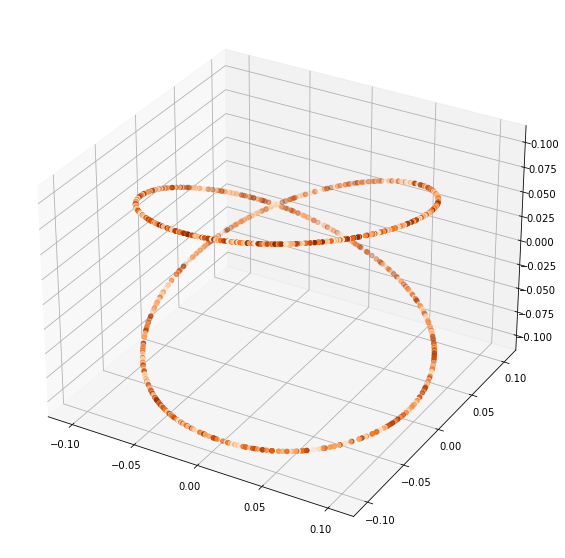

In [48]:
# Five eigenfunctions

L = 4
eigenvalue, eigenvector = diffusion.diffusion_algorithm(DMAP_vadere_data, L)

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(eigenvector[:, 0], eigenvector[:, 1], eigenvector[:, 2], eigenvector[:, 3], c=t_color, cmap=plt.cm.Oranges)

So, after 4 eigenfunctions, we begin to have intersections between the curves.